In [ ]:
"""
Solución factor de Gamow para átomo de Uranio-238
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy.lib import scimath as SM

m = 3662.634                   # Masa reducida sistema en MeV
hbar = 197                     # hbar*c
E = 4.27                       # energia particula alfa de U-235
Z_th = 90    
Z_alfa = 2                     # numero protones atomo elegido
e = np.sqrt(hbar/137)          # carga electron

r_a = 9.3 - 9.3                # 9.3 fm radio inicio de integracion en fm
r_b = 60.616  - 9.3            # radio fin de integracion
h = 0.1                        # paso para verlet
r = np.arange(r_a, r_b, h)


def potencial(r):
    return Z_th * Z_alfa * e*e / (r + 9.3)


def paso_verlet(h, phi_0, phi_1, r):
  phi_2 = h**2 * 2*m/hbar**2 * (potencial(r)-E)*phi_1 + 2*phi_1 - phi_0
  return phi_2


def verlet(ci0, ci1, h, r):
  verlet_array = np.zeros(len(r))
  verlet_array[0] = ci0
  verlet_array[1] = ci1
  for i in range(2, len(r)):
    verlet_array[i] = paso_verlet(h, verlet_array[i-2], verlet_array[i-1], r[i])
  return verlet_array

# Sol dentro de potencial  u = C*u1 + D*u2
u1 = verlet(0, 0.1, h, r)
u2 = verlet(0.1, 0.1, h, r)

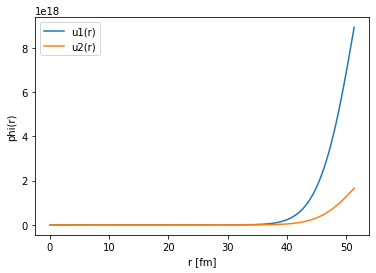

In [ ]:
# Visualizamos sol independientes de eq de onda.
plt.figure()
plt.clf()
plt.plot(r, u1, label='u1(r)')
plt.plot(r, u2, label='u2(r)')
plt.xlabel('r [fm]')
plt.ylabel('phi(r)')
plt.legend()
plt.show()

In [ ]:
# Valores de las derivadas en bordes r=0 y r= r_b
u1_dot0 = (u1[1] - u1[0]) / h
u2_dot0 = (u2[1] - u2[0]) / h
u1_dotR = (u1[-1] - u1[-2]) / h
u2_dotR = (u2[-1] - u2[-2]) / h

In [ ]:
k1 = np.sqrt(2*m*E/hbar**2)
v0 = 0.
k3 = SM.sqrt((E-v0)*2*m/hbar**2)

# Sistema de ecuaciones
eq1 = np.array([1, 1, -u1[0], -u2[0], 0])
eq2 = np.array([0, 0, u1[-1], u2[-1], -np.exp(k3*r_b*1j)])
eq3 = np.array([k1*1j, -k1*1j, -u1_dot0, -u2_dot0, 0])
eq4 = np.array([0, 0, u1_dotR, u2_dotR, -1j*k3*np.exp(k3*r_b*1j)])

eq5 = np.array([0, 0, 0, 1, 0])   # eq auxiliar

M = np.array([eq1, eq2, eq3, eq4, eq5])
b = np.zeros(5)
b[4] = 1       # imponemos valor sobre D para obtener razon

sol = np.linalg.solve(M, b)

In [ ]:
# sol = [A, B, C, D, F]
A = sol[0]
D = sol[3]
razon = np.abs(D/A)**2
print('Valor calculado de Factor de Gamow U-238:', round(razon, 2))
print('Valor teorico de Factor de Gamow U-238: 85.8')

Valor calculado de Factor de Gamow U-238: 75.79
Valor teorico de Factor de Gamow U-238: 85.8


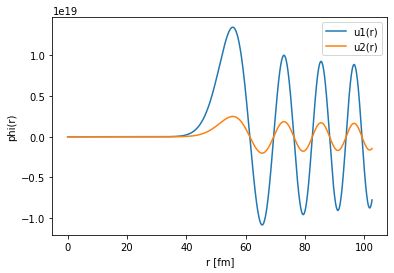

In [ ]:
# visualizacion funciones u1 y u2
r = np.arange(r_a, r_b*2, h)
u1 = verlet(0, 0.1, h, r)
u2 = verlet(0.1, 0.1, h, r)
plt.figure()
plt.clf()
plt.plot(r, u1, label='u1(r)')
plt.plot(r, u2, label='u2(r)')
plt.xlabel('r [fm]')
plt.ylabel('phi(r)')
plt.legend()
plt.show()

In [ ]:
A


In [ ]:
D